# Import Libraries

In [1]:
import pandas
import numpy

import matplotlib.pyplot as plotter
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
scaler = MinMaxScaler()

In [3]:
cpu_data = pandas.read_csv('feb21_cpu.csv')
net_tx_data = pandas.read_csv('feb21_network_tx.csv')
net_rx_data = pandas.read_csv('feb21_network_rx.csv')
disk_io_data = pandas.read_csv('feb21_disk_io.csv')

In [4]:
data = pandas.concat([cpu_data, net_rx_data, net_tx_data, disk_io_data], join='inner', axis=1)

In [5]:
data

,Unnamed: 0,Time,cpu_value host bb1localdomain type_instance idle,cpu_value host bb1localdomain type_instance interrupt,cpu_value host bb1localdomain type_instance nice,cpu_value host bb1localdomain type_instance softirq,cpu_value host bb1localdomain type_instance steal,cpu_value host bb1localdomain type_instance system,cpu_value host bb1localdomain type_instance user,cpu_value host bb1localdomain type_instance wait,...,disk_io_time host bb7localdomain instance mmcblk1boot1 type disk_io_time,disk_io_time host bb7localdomain instance mmcblk1p1 type disk_io_time,disk_io_time host bb8localdomain instance mmcblk1 type disk_io_time,disk_io_time host bb8localdomain instance mmcblk1boot0 type disk_io_time,disk_io_time host bb8localdomain instance mmcblk1boot1 type disk_io_time,disk_io_time host bb8localdomain instance mmcblk1p1 type disk_io_time,disk_io_time host bb9localdomain instance mmcblk1 type disk_io_time,disk_io_time host bb9localdomain instance mmcblk1boot0 type disk_io_time,disk_io_time host bb9localdomain instance mmcblk1boot1 type disk_io_time,disk_io_time host bb9localdomain instance mmcblk1p1 type disk_io_time
0,0,2018-02-21 13:29:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2018-02-21 13:29:05+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
2,2,2018-02-21 13:29:10+00:00,379.000000,0.0,0.0,0.666667,0.0,11.333333,4.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
3,3,2018-02-21 13:29:15+00:00,471.000000,0.0,0.0,1.333333,0.0,14.666667,6.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
4,4,2018-02-21 13:29:20+00:00,472.000000,0.0,0.0,0.666667,0.0,11.000000,7.333333,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
5,5,2018-02-21 13:29:25+00:00,472.000000,0.0,0.0,0.833333,0.0,11.000000,6.666667,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
6,6,2018-02-21 13:29:30+00:00,472.333333,0.0,0.0,1.500000,0.0,12.666667,6.666667,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
7,7,2018-02-21 13:29:35+00:00,471.666667,0.0,0.0,0.500000,0.0,13.333333,7.333333,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
8,8,2018-02-21 13:29:40+00:00,472.333333,0.0,0.0,0.500000,0.0,11.000000,5.666667,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
9,9,2018-02-21 13:29:45+00:00,472.666667,0.0,0.0,0.500000,0.0,11.000000,4.833333,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000


In [6]:
data = data.fillna(0)
print(data.columns)

Index(['Unnamed: 0', 'Time',
       'cpu_value host bb1localdomain type_instance idle',
       'cpu_value host bb1localdomain type_instance interrupt',
       'cpu_value host bb1localdomain type_instance nice',
       'cpu_value host bb1localdomain type_instance softirq',
       'cpu_value host bb1localdomain type_instance steal',
       'cpu_value host bb1localdomain type_instance system',
       'cpu_value host bb1localdomain type_instance user',
       'cpu_value host bb1localdomain type_instance wait',
       ...
       'disk_io_time host bb7localdomain instance mmcblk1boot1 type disk_io_time',
       'disk_io_time host bb7localdomain instance mmcblk1p1 type disk_io_time',
       'disk_io_time host bb8localdomain instance mmcblk1 type disk_io_time',
       'disk_io_time host bb8localdomain instance mmcblk1boot0 type disk_io_time',
       'disk_io_time host bb8localdomain instance mmcblk1boot1 type disk_io_time',
       'disk_io_time host bb8localdomain instance mmcblk1p1 type disk_

In [7]:
data.describe()

,Unnamed: 0,cpu_value host bb1localdomain type_instance idle,cpu_value host bb1localdomain type_instance interrupt,cpu_value host bb1localdomain type_instance nice,cpu_value host bb1localdomain type_instance softirq,cpu_value host bb1localdomain type_instance steal,cpu_value host bb1localdomain type_instance system,cpu_value host bb1localdomain type_instance user,cpu_value host bb1localdomain type_instance wait,cpu_value host bb10localdomain type_instance idle,...,disk_io_time host bb7localdomain instance mmcblk1boot1 type disk_io_time,disk_io_time host bb7localdomain instance mmcblk1p1 type disk_io_time,disk_io_time host bb8localdomain instance mmcblk1 type disk_io_time,disk_io_time host bb8localdomain instance mmcblk1boot0 type disk_io_time,disk_io_time host bb8localdomain instance mmcblk1boot1 type disk_io_time,disk_io_time host bb8localdomain instance mmcblk1p1 type disk_io_time,disk_io_time host bb9localdomain instance mmcblk1 type disk_io_time,disk_io_time host bb9localdomain instance mmcblk1boot0 type disk_io_time,disk_io_time host bb9localdomain instance mmcblk1boot1 type disk_io_time,disk_io_time host bb9localdomain instance mmcblk1p1 type disk_io_time
count,3141.000000,3141.000000,3141.0,3141.0,3141.000000,3141.0,3141.000000,3141.000000,3141.000000,3141.000000,...,3141.000000,3141.000000,3141.000000,3141.0,3141.0,3141.000000,3141.000000,3141.0,3141.0,3141.000000
mean,1570.000000,-14.928048,0.0,0.0,0.553274,0.0,6.880399,195.093335,-0.003820,74.866921,...,-0.016555,11.796243,21.262867,0.0,0.0,21.262867,21.030033,0.0,0.0,21.030033
std,906.872924,5237.772575,0.0,0.0,23.340156,0.0,448.403937,8008.527501,3.046662,158.567256,...,0.927832,388.795888,28.525696,0.0,0.0,28.525488,30.359439,0.0,0.0,30.359439
min,0.000000,-293328.000000,0.0,0.0,-1306.000000,0.0,-25112.000000,-448343.250000,-170.000000,0.000000,...,-52.000000,-21720.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
25%,785.000000,0.000000,0.0,0.0,0.333333,0.0,13.333333,6.666667,0.000000,0.000000,...,0.000000,0.000000,2.666667,0.0,0.0,2.666667,2.666667,0.0,0.0,2.666667
50%,1570.000000,0.000000,0.0,0.0,1.000000,0.0,15.500000,477.666667,0.000000,0.000000,...,0.000000,10.000000,13.333333,0.0,0.0,13.333333,13.333333,0.0,0.0,13.333333
75%,2355.000000,43.500000,0.0,0.0,1.500000,0.0,18.000000,483.000000,0.000000,40.500000,...,0.000000,25.333333,26.666667,0.0,0.0,26.666667,26.666667,0.0,0.0,26.666667
max,3140.000000,484.000000,0.0,0.0,20.333333,0.0,101.166667,572.500000,7.333333,468.000000,...,0.000000,228.000000,202.666667,0.0,0.0,202.666667,643.333333,0.0,0.0,643.333333


In [8]:
not_bb7 = list(filter(lambda x: 'bb7l' not in x, data.columns))
data = data.drop(['Unnamed: 0','Time'], axis=1)

In [9]:
data = data.clip(lower=0.0, upper=1000.0)

In [10]:
data.describe()

,cpu_value host bb1localdomain type_instance idle,cpu_value host bb1localdomain type_instance interrupt,cpu_value host bb1localdomain type_instance nice,cpu_value host bb1localdomain type_instance softirq,cpu_value host bb1localdomain type_instance steal,cpu_value host bb1localdomain type_instance system,cpu_value host bb1localdomain type_instance user,cpu_value host bb1localdomain type_instance wait,cpu_value host bb10localdomain type_instance idle,cpu_value host bb10localdomain type_instance interrupt,...,disk_io_time host bb7localdomain instance mmcblk1boot1 type disk_io_time,disk_io_time host bb7localdomain instance mmcblk1p1 type disk_io_time,disk_io_time host bb8localdomain instance mmcblk1 type disk_io_time,disk_io_time host bb8localdomain instance mmcblk1boot0 type disk_io_time,disk_io_time host bb8localdomain instance mmcblk1boot1 type disk_io_time,disk_io_time host bb8localdomain instance mmcblk1p1 type disk_io_time,disk_io_time host bb9localdomain instance mmcblk1 type disk_io_time,disk_io_time host bb9localdomain instance mmcblk1boot0 type disk_io_time,disk_io_time host bb9localdomain instance mmcblk1boot1 type disk_io_time,disk_io_time host bb9localdomain instance mmcblk1p1 type disk_io_time
count,3141.000000,3141.0,3141.0,3141.000000,3141.0,3141.000000,3141.000000,3141.000000,3141.000000,3141.0,...,3141.0,3141.000000,3141.000000,3141.0,3141.0,3141.000000,3141.000000,3141.0,3141.0,3141.000000
mean,78.458771,0.0,0.0,0.969065,0.0,14.875305,337.832352,0.050302,74.866921,0.0,...,0.0,18.711238,21.262867,0.0,0.0,21.262867,21.030033,0.0,0.0,21.030033
std,163.198852,0.0,0.0,0.966196,0.0,7.751143,209.675627,0.275341,158.567256,0.0,...,0.0,26.639965,28.525696,0.0,0.0,28.525488,30.359439,0.0,0.0,30.359439
min,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
25%,0.000000,0.0,0.0,0.333333,0.0,13.333333,6.666667,0.000000,0.000000,0.0,...,0.0,0.000000,2.666667,0.0,0.0,2.666667,2.666667,0.0,0.0,2.666667
50%,0.000000,0.0,0.0,1.000000,0.0,15.500000,477.666667,0.000000,0.000000,0.0,...,0.0,10.000000,13.333333,0.0,0.0,13.333333,13.333333,0.0,0.0,13.333333
75%,43.500000,0.0,0.0,1.500000,0.0,18.000000,483.000000,0.000000,40.500000,0.0,...,0.0,25.333333,26.666667,0.0,0.0,26.666667,26.666667,0.0,0.0,26.666667
max,484.000000,0.0,0.0,20.333333,0.0,101.166667,572.500000,7.333333,468.000000,0.0,...,0.0,228.000000,202.666667,0.0,0.0,202.666667,643.333333,0.0,0.0,643.333333


In [11]:
def scale_data(data, fit=0):
    
    if fit:
        scaler.fit(data)
    return scaler.transform(data)

In [12]:
data = scale_data(data,1)

In [13]:
plotter.imshow(data[:500].T)

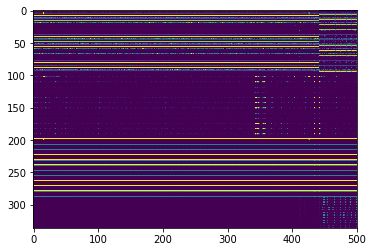

In [14]:
plotter.show()

In [15]:
plotter.imshow(data[500:1000].T)

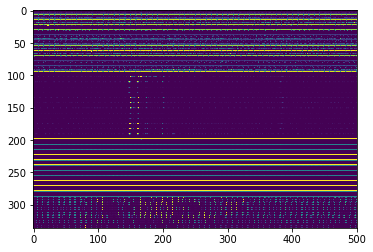

In [16]:
plotter.show()

In [17]:
plotter.imshow(data[1000:1500].T)

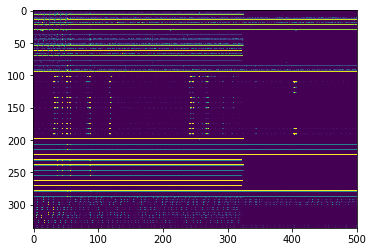

In [18]:
plotter.show()

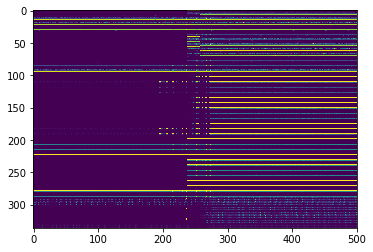

In [19]:
plotter.imshow(data[1500:2000].T)
plotter.show()

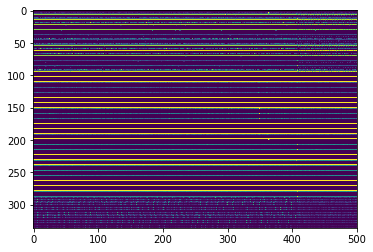

In [20]:
plotter.imshow(data[2000:2500].T)
plotter.show()

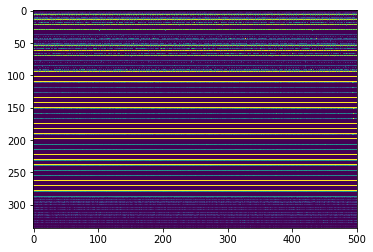

In [21]:
plotter.imshow(data[2500:3000].T)
plotter.show()

In [22]:
data.shape

(3141, 336)

In [23]:
pca = PCA(n_components=2)
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

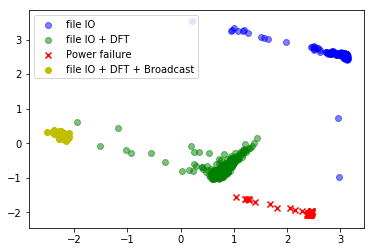

In [24]:
data_app1 = pca.transform(data[:400])
plotter.scatter(data_app1[:,0], data_app1[:,1], c='b', alpha=0.5, label='file IO')

data_app12 = pca.transform(data[500:1000])
plotter.scatter(data_app12[:,0], data_app12[:,1], c='g', alpha=0.5, label='file IO + DFT')

data_anomaly = pca.transform(data[1400:1700])
plotter.scatter(data_anomaly[:,0], data_anomaly[:,1], marker='x', c='r', label='Power failure')

data_everything = pca.transform(data[2000:2400])
plotter.scatter(data_everything[:,0], data_everything[:,1], c='y', label='file IO + DFT + Broadcast')
plotter.legend()
plotter.show()


In [35]:
kmeans = KMeans(n_clusters=4,random_state=1)
kmeans.fit(data)
labels = kmeans.labels_
a4=silhouette_score(data, labels, metric='euclidean')

In [36]:
kmeans = KMeans(n_clusters=4,random_state=1)
kmeans.fit(pca.transform(data))
labels = kmeans.labels_
silhouette_score(data, labels, metric='euclidean')

0.67751977229138305

In [37]:
kmeans = KMeans(n_clusters=5,random_state=1)
kmeans.fit(data)
labels = kmeans.labels_
a5=silhouette_score(data, labels, metric='euclidean')

In [38]:
kmeans = KMeans(n_clusters=3,random_state=1)
kmeans.fit(data)
labels = kmeans.labels_
a3=silhouette_score(data, labels, metric='euclidean')

In [39]:
kmeans = KMeans(n_clusters=2,random_state=1)
kmeans.fit(data)
labels = kmeans.labels_
a2=silhouette_score(data, labels, metric='euclidean')

In [40]:
kmeans = KMeans(n_clusters=6,random_state=1)
kmeans.fit(data)
labels = kmeans.labels_
a6=silhouette_score(data, labels, metric='euclidean')

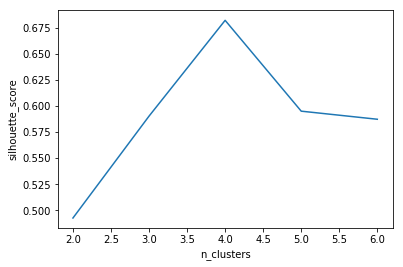

In [45]:
plotter.plot([2,3,4,5,6],[a2,a3,a4,a5,a6])
plotter.xlabel('n_clusters')
plotter.ylabel('silhouette_score')
plotter.show()